# Imbalanced Dataset - (It should be used only in classified dataset)

Imagine, you have two categories in your dataset to predict- Category A and Category B. When Category A is higher than Category B or vice-versa, you have a problem of imbalanced dataset.

## SMOTE -Synthetic Minority Oversampling Technique

SMOTE is a over-sampling method. It creates synthetic samples of the minority class. Hence making the minority class equal to the majority class. SMOTE does this by selecting similar records and altering that records one column at a time by a random amount within the difference to the neighbouring records.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [3]:
ds = pd.read_csv('pima_indian_diabetes.csv', header = 0, names = range(0,8))
ds

,0,1,2,3,4,5,6,7
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1


In [4]:
df = pd.DataFrame(data=ds)
df

,0,1,2,3,4,5,6,7
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1


In [5]:
dfx = df.iloc[:,0:7]
dfx

,0,1,2,3,4,5,6
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33
5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63
2,122,70,27,0,36.8,0.340,27
5,121,72,23,112,26.2,0.245,30
1,126,60,0,0,30.1,0.349,47


In [6]:
dfy = df.iloc[:,-1]
dfy

1     0
8     1
1     0
0     1
5     0
     ..
10    0
2     0
5     0
1     1
1     0
Name: 7, Length: 767, dtype: int64

In [7]:
dfy.value_counts()

0    500
1    267
Name: 7, dtype: int64

Total numbers of high(1) values are 267 that is not equivalentto 0. Hence lets just make it balanced by using SMOTE technique.

<AxesSubplot:xlabel='7', ylabel='count'>

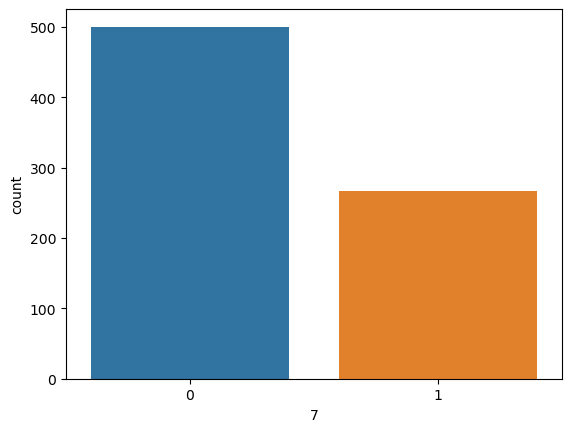

In [8]:
sns.countplot(dfy)

### Applying SMOTE:

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
smt = SMOTE()
x_train, y_train = smt.fit_resample(dfx,dfy)

In [11]:
x_train.value_counts()

0    1   2   3    4          5         6 
0    48  20  0    24.700000  0.140000  22    1
137  84  0   0    31.200000  0.252000  30    1
136  83  35  130  28.443918  0.265652  41    1
                  28.794212  0.279408  41    1
     84  35  130  28.300000  0.260000  42    1
                                            ..
108  70  0   0    30.500000  0.955000  33    1
     72  43  75   36.100000  0.263000  33    1
     80  0   0    27.000000  0.259000  52    1
         31  0    37.007816  1.128028  42    1
199  76  43  0    42.900000  1.394000  22    1
Length: 1000, dtype: int64

In [13]:
y_train.value_counts()

0    500
1    500
Name: 7, dtype: int64

<AxesSubplot:xlabel='7', ylabel='count'>

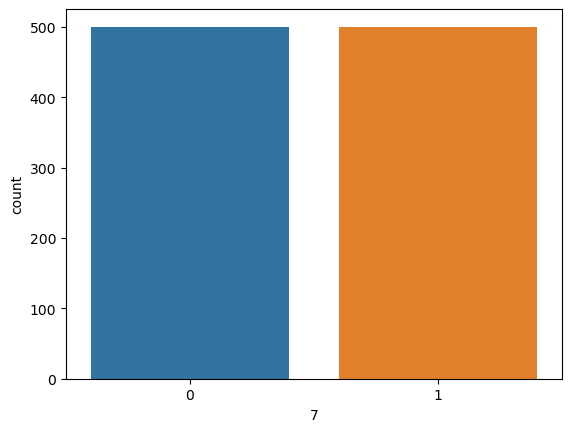

In [14]:
sns.countplot(y_train)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x_train,y_train, test_size = .30, random_state=45)

In [17]:
xtrain.shape

(700, 7)

In [18]:
ytrain.shape

(700,)

In [22]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
lg.score(xtrain,ytrain)
pred = lg.predict(xtest)

from sklearn.metrics import accuracy_score
print(round(accuracy_score(ytest,pred),2))

0.72


#### Another Dataset we are using where we have classified Dataset

In [24]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
iris.sample(3)

,sepal length,sepal width,petal length,petal width,class
15,5.7,4.4,1.5,0.4,Iris-setosa
81,5.5,2.4,3.7,1.0,Iris-versicolor
36,5.5,3.5,1.3,0.2,Iris-setosa


In [26]:
iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

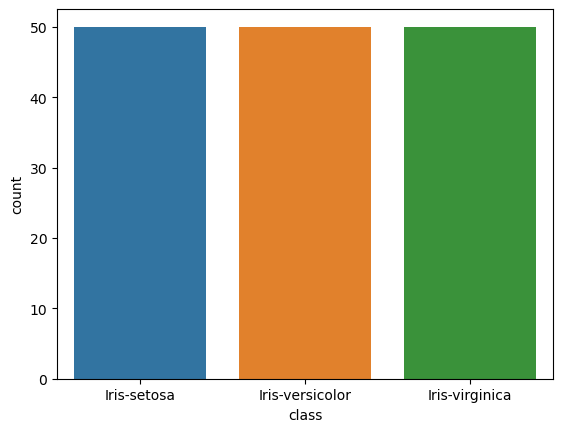

In [27]:
sns.countplot(iris['class'])

#### Another Dataset

In [28]:
wine = pd.read_csv("winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

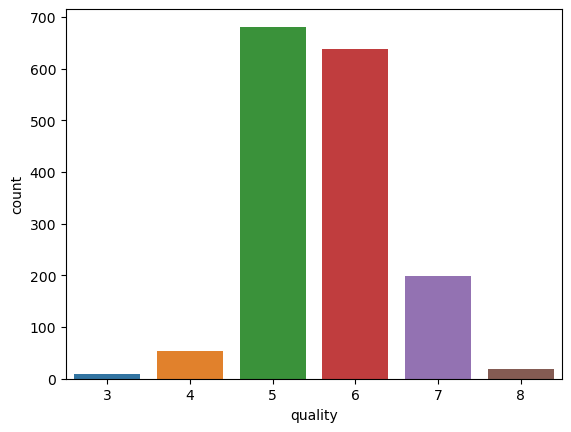

In [30]:
sns.countplot(wine['quality'])

In [31]:
x = wine.iloc[:,0:-1]
y= wine.iloc[:,-1]

In [32]:
y.shape

(1599,)

In [33]:
x.shape

(1599, 11)

In [35]:
from imblearn.over_sampling import SMOTE

sm= SMOTE()
xtrain,ytrain = sm.fit_resample(x,y)

In [37]:
ytrain

0       5
1       5
2       5
3       6
4       5
       ..
4081    8
4082    8
4083    8
4084    8
4085    8
Name: quality, Length: 4086, dtype: int64

In [36]:
ytrain.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

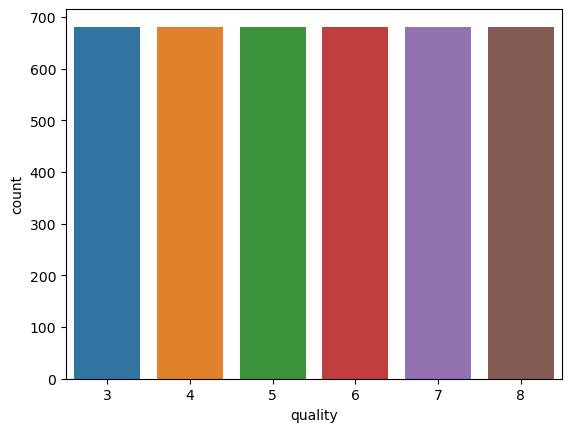

In [39]:
sns.countplot(ytrain)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

xtrain,xtest,ytrain,ytest = train_test_split(xtrain,ytrain, test_size=.30, random_state=45)

dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

pred = dtc.predict(xtest)
print("Accuracy :",accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))

Accuracy : 0.768352365415987
[[210   2   6   0   2   0]
 [  5 155  15  19   2   0]
 [  8  27 123  31  10   0]
 [  2  19  36 103  41   6]
 [  1   1   7  27 156   8]
 [  0   0   0   1   8 195]]


#### ANother Dataset

In [43]:
pumpkin = pd.read_csv('Pumpkin_Seeds_Dataset.csv')
pumpkin.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,CERCEVELIK
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,CERCEVELIK
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,CERCEVELIK
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,CERCEVELIK
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,CERCEVELIK


In [44]:
pumpkin['Class'].value_counts()

CERCEVELIK       1300
URGUP_SIVRISI    1200
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

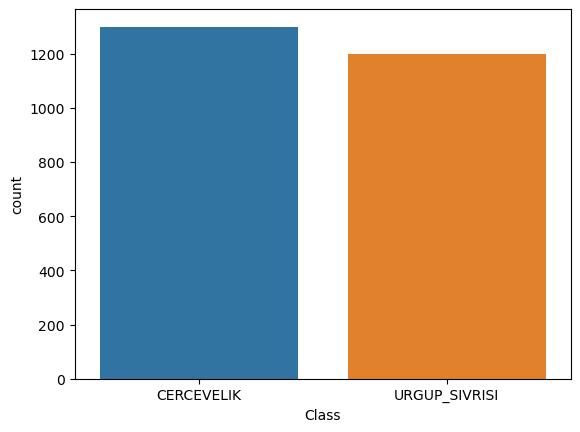

In [45]:
sns.countplot(pumpkin['Class'])

In [46]:
x = pumpkin.iloc[:,0:-1]
y = pumpkin.iloc[:,-1]

In [47]:
x.shape

(2500, 12)

In [48]:
y.shape

(2500,)

In [50]:
# Appling SMOTE as the dataset is imbalanced

sm = SMOTE()
xtrain,ytrain = sm.fit_resample(x,y)

In [51]:
ytrain.shape

(2600,)

In [52]:
xtrain.shape

(2600, 12)

In [53]:
ytrain.value_counts()

CERCEVELIK       1300
URGUP_SIVRISI    1300
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

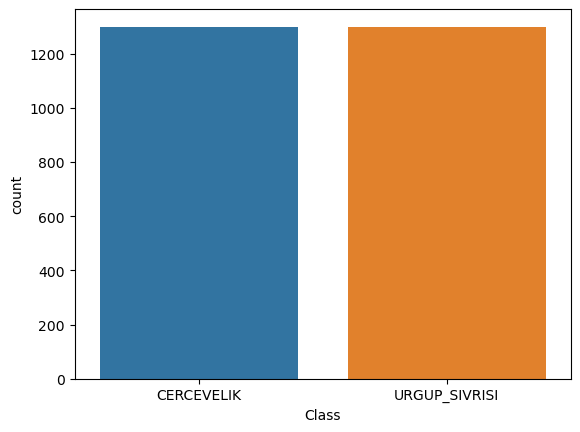

In [54]:
sns.countplot(ytrain)

#### Another Dataset

In [55]:
cancer = pd.read_csv('cancer.csv')
cancer.head()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [59]:
cancer =pd.DataFrame(data = cancer)
cancer 

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
